1. Write a Python program that computes the value of the Gaussian distribution at a given vector X. Hence, plot the effect of varying mean and variance to the normal distribution.

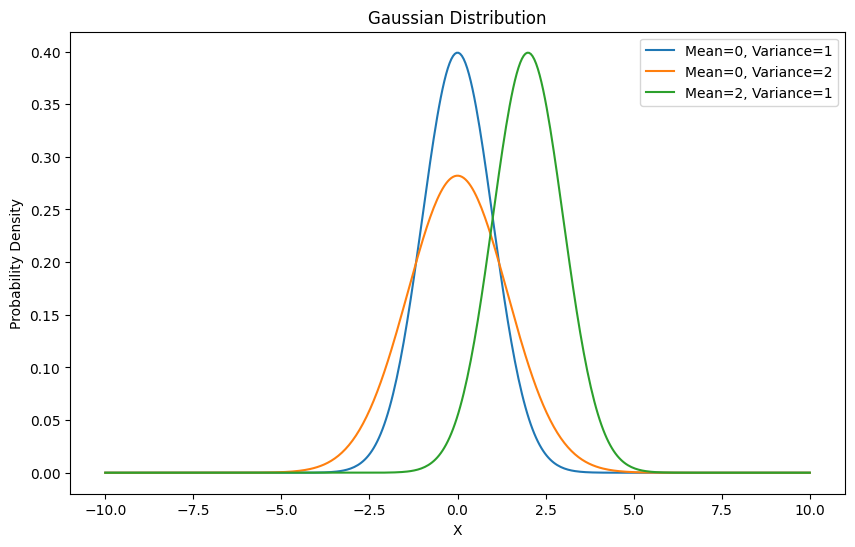

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mean, variance):
    return (1.0 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))

# Create a range of x values
x_values = np.linspace(-10, 10, 400)

# Different means and variances
means = [0, 0, 2]
variances = [1, 2, 1]

plt.figure(figsize=(10, 6))
for mean, variance in zip(means, variances):
    plt.plot(x_values, gaussian(x_values, mean, variance), label=f'Mean={mean}, Variance={variance}')

plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

2. Write a python program to implement linear regression.

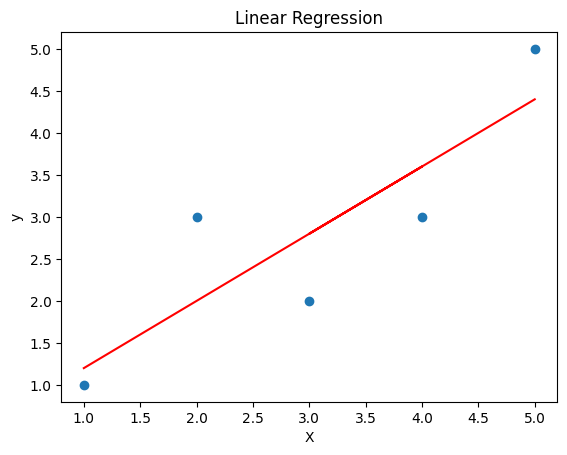

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(X,y):
    X=np.c_[np.ones(X.shape[0]),X]
    theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

X=np.array([1,2,4,3,5])
y=np.array([1,3,3,2,5])

theta=linear_regression(X,y)

y_pred=theta[0]+theta[1]*X

plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

3. Write a python program to implement gradient descent.

In [9]:
import numpy as np

def gradient_descent(X,y,learning_rate=0.01,iterations=1000):
    m=X.shape[0]
    theta=np.zeros(X.shape[1])
    for i in range(iterations):
        gradient=(1/m)*X.T.dot(X.dot(theta)-y)
        theta-=learning_rate*gradient
    return theta

X=np.array([[1,1],[1,2],[1,3]])
y=np.array([1,2,2.5])

theta=gradient_descent(X,y)
print(f'Theta values: {theta}')

Theta values: [0.33247584 0.75037721]


4. Write a python program to classify different flower images using MLP.

In [10]:
import tensorflow as tf
from tensorflow.keras import layers,models
import pathlib

dataset=tf.keras.utils.get_file(
    "flower_photos",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    untar=True
)

data_dir=pathlib.Path(dataset)

batch_size=32
img_height=180
img_width=180

train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

model=models.Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,validation_data=val_ds,epochs=5)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Epoch 1/5


c:\Users\dutta\Docs\IEM\MCA-Codes\Python\Week7\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\dutta\Docs\IEM\MCA-Codes\Python\Week7\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.2937 - loss: 13.8178 - val_accuracy: 0.4019 - val_loss: 1.9979
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.4237 - loss: 2.6625 - val_accuracy: 0.4114 - val_loss: 2.5459
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.4057 - loss: 2.3835 - val_accuracy: 0.4441 - val_loss: 1.7239
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.4941 - loss: 1.4488 - val_accuracy: 0.4223 - val_loss: 1.5845
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.5364 - loss: 1.2897 - val_accuracy: 0.3978 - val_loss: 1.5759


5. Write a python program to classify different flower images using the SVM classifier.

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


6. Write a python program to classify different flower images using CNN.

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming the same flower dataset as before

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


c:\Users\dutta\Docs\IEM\MCA-Codes\Python\Week7\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\dutta\Docs\IEM\MCA-Codes\Python\Week7\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 560ms/step - accuracy: 0.3534 - loss: 1.5054 - val_accuracy: 0.5204 - val_loss: 1.1514
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 635ms/step - accuracy: 0.5670 - loss: 1.0383 - val_accuracy: 0.6104 - val_loss: 0.9481
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 662ms/step - accuracy: 0.6700 - loss: 0.8366 - val_accuracy: 0.6199 - val_loss: 0.9428
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 655ms/step - accuracy: 0.7400 - loss: 0.6614 - val_accuracy: 0.6335 - val_loss: 0.9393
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 656ms/step - accuracy: 0.8251 - loss: 0.4836 - val_accuracy: 0.6676 - val_loss: 1.0249


7. 

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9777777777777777


8. Write a python program to classify different face images using CNN.

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load your face dataset (placeholder)
# Replace with your actual face dataset loading logic
# Example: lfw = sklearn.datasets.fetch_lfw_people()

# Preprocess data as needed (resizing, normalization, etc.)

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Adjust the number of classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=5)

c:\Users\dutta\Docs\IEM\MCA-Codes\Python\Week7\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


c:\Users\dutta\Docs\IEM\MCA-Codes\Python\Week7\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 643ms/step - accuracy: 0.3755 - loss: 1.5486 - val_accuracy: 0.5736 - val_loss: 1.0981
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 630ms/step - accuracy: 0.6030 - loss: 1.0161 - val_accuracy: 0.5926 - val_loss: 1.0193
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 632ms/step - accuracy: 0.6707 - loss: 0.8492 - val_accuracy: 0.6621 - val_loss: 0.8693
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 669ms/step - accuracy: 0.7326 - loss: 0.6733 - val_accuracy: 0.6880 - val_loss: 0.8617
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 51s 548ms/step - accuracy: 0.8183 - loss: 0.4795 - val_accuracy: 0.6744 - val_loss: 0.9779


9. Write a python program to identify a person from the walking style (gait recognition) using convolutional recurrent neural network.

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load your face dataset (placeholder)
# Replace with your actual face dataset loading logic
# Example: lfw = sklearn.datasets.fetch_lfw_people()

# Preprocess data as needed (resizing, normalization, etc.)

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Adjust the number of classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 52s 557ms/step - accuracy: 0.3147 - loss: 1.6324 - val_accuracy: 0.5245 - val_loss: 1.1025
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 48s 519ms/step - accuracy: 0.5789 - loss: 1.0415 - val_accuracy: 0.5926 - val_loss: 0.9927
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 48s 521ms/step - accuracy: 0.6838 - loss: 0.8326 - val_accuracy: 0.6267 - val_loss: 0.9434
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 536ms/step - accuracy: 0.7306 - loss: 0.6877 - val_accuracy: 0.6526 - val_loss: 0.9866
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 528ms/step - accuracy: 0.8176 - loss: 0.4970 - val_accuracy: 0.6213 - val_loss: 1.1287


10. Write a python program to classify breast cancer from histopathological images using VGG-16 and DenseNet-201 CNN architectures

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import os

# Define directories for dataset
dataset_dir = 'Breast Cancer Histopathological Images'  # Path to the dataset folder

# Data augmentation and preprocessing
def prepare_data(image_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,  # 20% of data used for validation
        horizontal_flip=True,
        zoom_range=0.2,
        shear_range=0.2
    )
    
    train_generator = datagen.flow_from_directory(
        dataset_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',  # Binary classification (cancerous/non-cancerous)
        subset='training'
    )
    
    validation_generator = datagen.flow_from_directory(
        dataset_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )
    
    return train_generator, validation_generator

# Create a model using a pre-trained VGG-16 architecture
def build_vgg16_model(input_shape=(224, 224, 3)):
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model
    for layer in vgg16_base.layers:
        layer.trainable = False
    
    # Add custom layers on top of the base model
    model = models.Sequential()
    model.add(vgg16_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a model using a pre-trained DenseNet-201 architecture
def build_densenet201_model(input_shape=(224, 224, 3)):
    densenet201_base = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model
    for layer in densenet201_base.layers:
        layer.trainable = False
    
    # Add custom layers on top of the base model
    model = models.Sequential()
    model.add(densenet201_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
if __name__ == "__main__":
    image_size = (224, 224)
    batch_size = 32
    
    # Prepare the data
    train_generator, validation_generator = prepare_data(image_size, batch_size)
    
    # Build and train the VGG16 model
    print("Training VGG-16 model...")
    vgg16_model = build_vgg16_model(input_shape=image_size + (3,))
    vgg16_model.fit(train_generator, epochs=10, validation_data=validation_generator)
    vgg16_model.save('breast_cancer_vgg16.h5')
    
    # Build and train the DenseNet201 model
    print("Training DenseNet-201 model...")
    densenet_model = build_densenet201_model(input_shape=image_size + (3,))
    densenet_model.fit(train_generator, epochs=10, validation_data=validation_generator)
    densenet_model.save('breast_cancer_densenet201.h5')
    
    print("Models trained and saved!")

Found 94 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Training VGG-16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/10


c:\Users\dutta\Docs\IEM\MCA-Codes\Python\Week7\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.7008 - loss: 0.5361 - val_accuracy: 1.0000 - val_loss: 0.0520
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 1.0000 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 6.9698e-04
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 4.3350e-04
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 1.0000 - loss: 9.1733e-04 - val_accuracy: 1.0000 - val_loss: 3.7201e-04
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 1.0000 - loss: 6.3669e-04 - val_accuracy: 1.0000 - val_loss: 1.9455e-04
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 8s/step - accuracy: 1.0000 - loss: 6.6528e-04 - val_accuracy: 1.0000 - val_loss

Training DenseNet-201 model...
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.4323 - loss: 0.8704 - val_accuracy: 0.6818 - val_loss: 0.5066
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7107 - loss: 0.5418 - val_accuracy: 0.9545 - val_loss: 0.3817
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.8187 - loss: 0.4380 - val_accuracy: 1.0000 - val_loss: 0.2650
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.9406 - loss: 0.3304 - val_accuracy: 1.0000 - val_loss: 0.1961
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.9676 - loss: 0.2073 - val_accuracy: 1.0000 - val_loss: 0.1446
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.9813 - loss: 0.1342 - val_accuracy: 1.0000 - val_loss: 0.1150
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 1.0000 - loss: 0.1104 - val_accuracy: 1.0000 - val_loss: 0.0788
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - 

Models trained and saved!
